In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", 37)

In [3]:
df=pd.read_csv('1.2ML_ModelTraining_Dataset.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
## dataset shape 
print(f"{'shape of the dataset'.title()} :- {df.shape}")

## duplicate values
print(f"\n {'number of duplicate values'.title()} :- {len(df.loc[df.duplicated()])}")

## information about dataset
print(f"{'dataset info'.title()}\n ")
df.info()

Shape Of The Dataset :- (9240, 37)

 Number Of Duplicate Values :- 0
Dataset Info
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                 

In [5]:
#checking null values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
#summary statistics
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
df_cat=df.loc[:,df.dtypes==np.object]

In [8]:
#summary statistics of categorical variables
df_cat.describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,f08604ae-a2fa-4d64-8a42-a95ff2bddfed,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


In [9]:
temp=df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]

Text(0.5, 1.0, 'feature correlation with target variable - Converted')

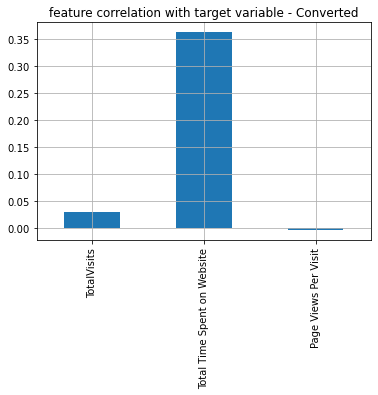

In [10]:
#input-output correlation
plt.figure(figsize=(6,4))
temp.drop('Converted',axis=1).corrwith(temp['Converted']).plot(kind='bar',grid=True)
plt.title("feature correlation with target variable - Converted")

In [11]:
#class value count for each variables(feature)
for column in df.columns:
    print(df[column].value_counts())
    print('************************************************************************************************************')
    print('\n')

f08604ae-a2fa-4d64-8a42-a95ff2bddfed    1
f0e0e107-45f3-4358-9034-6e953de0fa56    1
024257f9-1c88-4e5b-b02d-32bbbb9fedb5    1
ca3efe55-eb64-457b-b626-4d138c00d83c    1
e81b5553-7199-4493-9c7a-09b2511f2143    1
                                       ..
7fda7d26-d0f4-43ec-9c85-fb81e25019ac    1
5346a343-7f6b-4fb3-90ac-11a3c5d20eb0    1
fec60561-899e-43e3-ac2c-bc78e654619a    1
197df487-e6cb-40ec-814c-a4044f78cf8f    1
2a0d97de-06a1-4347-9019-fba34e4a17d7    1
Name: Prospect ID, Length: 9240, dtype: int64
************************************************************************************************************


655360    1
604698    1
621242    1
619195    1
600768    1
         ..
593502    1
636228    1
648518    1
580937    1
608255    1
Name: Lead Number, Length: 9240, dtype: int64
************************************************************************************************************


Landing Page Submission    4886
API                        3580
Lead Add Form               

In [12]:
#replacing unknown category with NAN
df = df.replace('Select', np.nan)

In [13]:
#NAN values by % in columns
round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [14]:
#dropping columns with excessive missing values
df.drop(columns=['Prospect ID','Lead Number','Do Not Email','Do Not Call','Country','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Profile Score','I agree to pay the amount through cheque','Lead Quality','Lead Profile','Asymmetrique Activity Score'],axis=1,inplace=True)

In [15]:
df.shape

(9240, 11)

In [16]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,Interested in other courses,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,NaN,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Ringing,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,NaN,Will revert after reading the email,No,Modified


In [17]:
#imputing nan value for categorical features
columns=['Specialization','Tags','Last Activity','Lead Source']
for col in columns:
    df[col]=df[col].fillna(df[col].mode()[0])

In [18]:
#imputing nan values for numerical features
columns=['TotalVisits','Page Views Per Visit']
for col in columns:
    df[col]=df[col].fillna(df[col].median())

In [19]:
round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [20]:
#one hot encoding of categorical features
dummies = pd.get_dummies(df.select_dtypes(include=['object']), drop_first=True)
numerical_df = df.drop(df.select_dtypes(include=['object']).columns, axis=1)
labeled_df = pd.concat([numerical_df, dummies], axis=1)

labeled_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,...,Tags_switched off,Tags_wrong number given,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [21]:
#converting float to int
labeled_df[['TotalVisits','Page Views Per Visit']] = labeled_df[['TotalVisits','Page Views Per Visit']].astype(int)

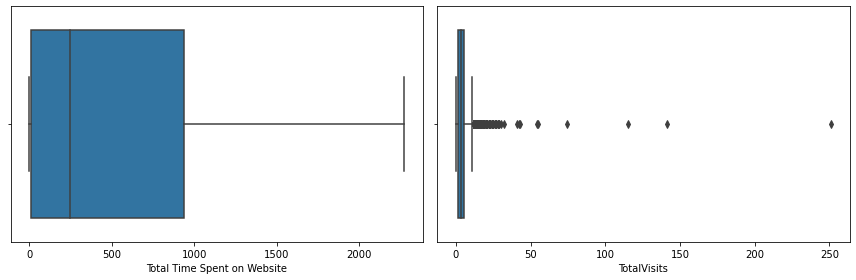

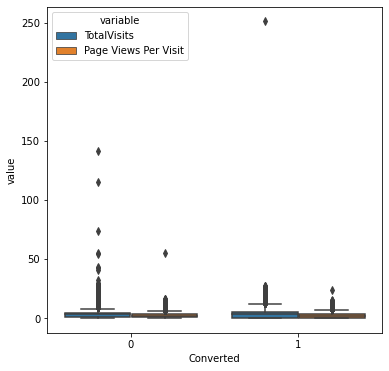

In [22]:
#checking outliers in numerical column by boxplot
num_df = labeled_df[['Converted','TotalVisits','Page Views Per Visit','Total Time Spent on Website']]

def plot_boxes():
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    sns.boxplot(data=labeled_df, x='Total Time Spent on Website')

    plt.subplot(122)
    sns.boxplot(data=labeled_df, x='TotalVisits')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 6))
    box_long = pd.melt(num_df.drop('Total Time Spent on Website', axis=1), id_vars='Converted')
    sns.boxplot(x='Converted', y='value', hue='variable', data=box_long)
    plt.show()
    
plot_boxes()

In [23]:
#skewness before outlier removal
labeled_df.iloc[:,1:4].skew()

TotalVisits                    20.061230
Total Time Spent on Website     0.956450
Page Views Per Visit            2.945473
dtype: float64

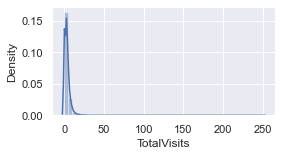

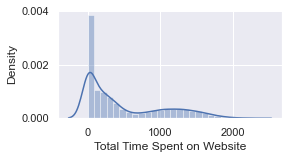

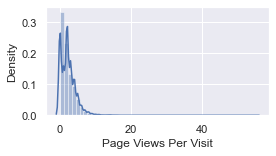

In [24]:
#distplot before outlier removal
sns.set(rc={'figure.figsize':(4,2)})
for i in labeled_df.iloc[:,1:4]:
    plt.figure()
    sns.distplot(labeled_df.iloc[:,1:4][i],kde=True)

In [25]:
#outlier removal
out_df = num_df.drop('Converted', axis=1)
q = out_df.quantile(0.97)
out_df = out_df[out_df < q]
out_df = out_df.dropna()

labeled_df = labeled_df.loc[out_df.index].reset_index(drop=True)
num_df = num_df.loc[out_df.index].reset_index(drop=True)

print(f"{round(len(labeled_df)/9240*100,2)}% data has been retained after outlier removal.")

90.5% data has been retained after outlier removal.


In [26]:
pd.set_option("display.max_rows", 101)

In [27]:
#skewness after outlier removal
labeled_df.iloc[:,1:4].skew()

TotalVisits                    0.733210
Total Time Spent on Website    0.978996
Page Views Per Visit           0.488118
dtype: float64

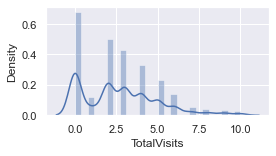

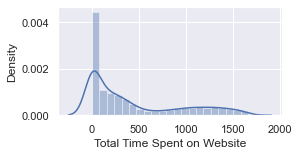

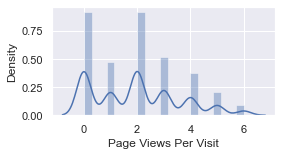

In [28]:
#distplot after outlier removal
sns.set(rc={'figure.figsize':(4,2)})
for i in labeled_df.iloc[:,1:4]:
    plt.figure()
    sns.distplot(labeled_df.iloc[:,1:4][i],kde=True)

In [29]:
#input and output
from sklearn.model_selection import train_test_split
X = labeled_df.drop('Converted', axis=1)
y = labeled_df['Converted']

In [30]:
#normalization using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = X.columns
scaled_X = pd.DataFrame(scaler.fit_transform(X[cols[:3]]), columns=cols[:3])
scaled_X = pd.concat([scaled_X, X.drop(cols[:3], axis=1).reset_index(drop=True)], axis=1)

In [31]:
#checking multi-collinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = scaled_X.columns
vif_data["VIF"] = [variance_inflation_factor(scaled_X.values, i)
                          for i in range(len(scaled_X.columns))]
vif_data

,feature,VIF
0,TotalVisits,6.500332
1,Total Time Spent on Website,2.496113
2,Page Views Per Visit,7.362024
3,Lead Origin_Landing Page Submission,6.700196
4,Lead Origin_Lead Add Form,19.948010
5,Lead Origin_Lead Import,27.552462
6,Lead Origin_Quick Add Form,NaN
7,Lead Source_Direct Traffic,654.167243
8,Lead Source_Facebook,42.770113
9,Lead Source_Google,765.506275


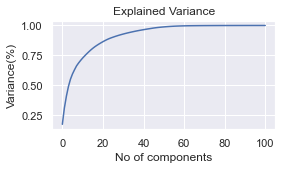

In [32]:
#checking no of columns explaining required sufficient variance.  
from sklearn.decomposition import PCA
pca=PCA()
principalComponents=pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance')
plt.show()

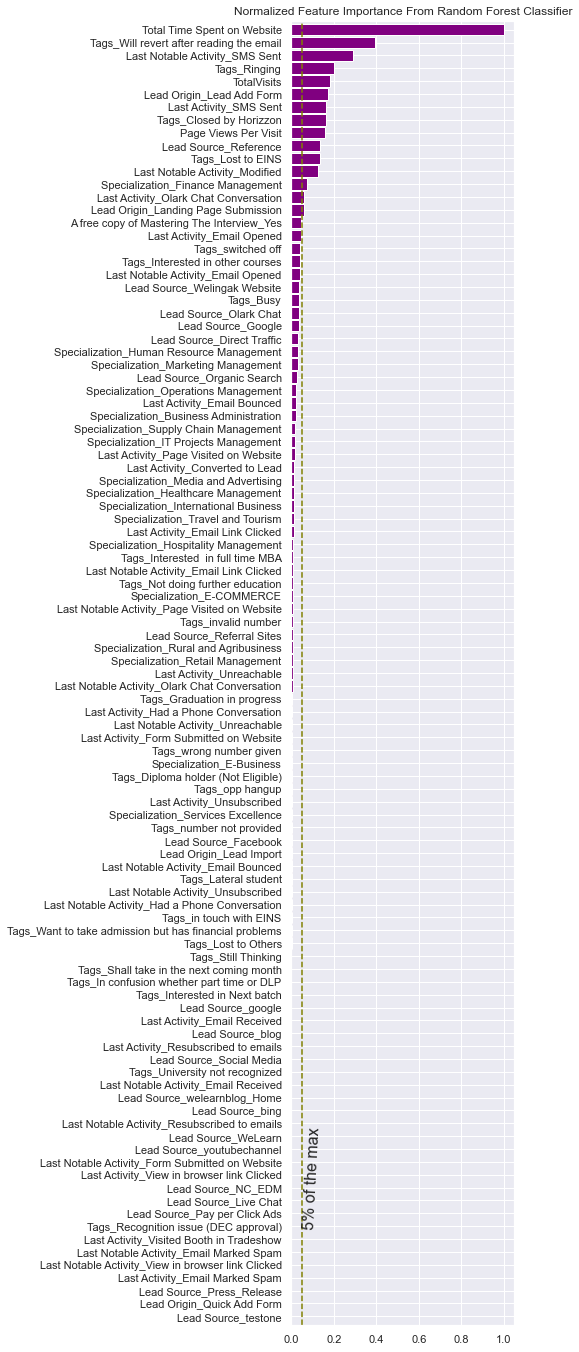

In [33]:
#feature importance for feature selection purpose
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(scaled_X,y)
plt.figure(figsize=(4,24))
feature_labels = np.array((scaled_X.columns))
(pd.Series(rf.feature_importances_,index=feature_labels).sort_values(ascending=True)/np.max(rf.feature_importances_)).plot.barh(color='purple',width=0.9)
_ = plt.title('Normalized Feature Importance From Random Forest Classifier')
_ = plt.axvline(0.05,linestyle='--',color='olive')
_ = plt.text(0.05,7,'5% of the max',rotation=87,fontsize=16)

In [34]:
#similar to PCA screeplot
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
logistic=LogisticRegression(C=1,solver='liblinear',penalty='l1',random_state=7).fit(scaled_X,y)
model=SelectFromModel(logistic,prefit=True)
X_new=model.transform(scaled_X)

X_new=pd.DataFrame(X_new)
selected_columns=X_new.columns[X_new.var()!=0]
selected_columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53],
           dtype='int64')

In [35]:
#splitting dataset for modelling
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, stratify=y, test_size=0.30, random_state=42,shuffle=True)

In [36]:
#p value stats
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(list(y_train), X_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5853
Model:                            GLM   Df Residuals:                     5762
Model Family:                Binomial   Df Model:                           90
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1587.2
Date:                Thu, 28 Oct 2021   Deviance:                       3174.4
Time:                        17:26:21   Pearson chi2:                 1.09e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     39.5347   2.58e+05      0.000      1.000   -5.06e+05    5.06e+05
TotalVisits                                                0.3536      0.315      1.121      0.262      -0.264       0.972
Total Time Spent on Website                                3.7964      0.183     20.762      0.000       3.438       4.155
Page Views Per Visit                                      -0.6245      0.278     -2.244      0.025      -1.170      -0.079
Lead Origin_Landing Page Submission                       -0.4449      0.162     -2.746      0.006      -0.762      -0.127
Lead Origin_Lead Add Form                                  3.3595      0.783      4.289      0.000       1.824       4.895
Lead Origin_Lead Import                                   22.9859   3.75e+04      0.001      1.000   -7.36e+04    7.36e+04
Lead Origin_Quick Add Form                              2.276e-09   3.03e-05   7.52e-05      1.000   -5.93e-05    5.93e-05
Lead Source_Direct Traffic                               -20.3964   1.41e+05     -0.000      1.000   -2.76e+05    2.76e+05
Lead Source_Facebook                                     -42.2646   1.46e+05     -0.000      1.000   -2.86e+05    2.86e+05
Lead Source_Google                                       -20.4705   1.41e+05     -0.000      1.000   -2.76e+05    2.76e+05
Lead Source_Live Chat                                      1.1102   2.58e+05   4.31e-06      1.000   -5.05e+05    5.05e+05
Lead Source_NC_EDM                                      2.857e-09   1.68e-05      0.000      1.000   -3.29e-05    3.29e-05
Lead Source_Olark Chat                                   -19.6384   1.41e+05     -0.000      1.000   -2.76e+05    2.76e+05
Lead Source_Organic Search                               -20.2230   1.41e+05     -0.000      1.000   -2.76e+05    2.76e+05
Lead Source_Pay per Click Ads                            -40.1216   2.58e+05     -0.000      1.000   -5.05e+05    5.05e+05
Lead Source_Press_Release                              -1.707e-09    1.4e-05     -0.000      1.000   -2.74e-05    2.74e-05
Lead Source_Reference                                    -20.7820   1.41e+05     -0.000      1.000   -2.76e+05    2.76e+05
Lead Source_Referral Sites                               -20.3953   1.41e+05     -0.000      1.000   -2.76e+05    2.76e+05
Lead Source_Social Media                                 -17.0760   1.41e+05     -0.000      1.000   -2.76e+05    2.76e+05
Lead Source_WeLearn                                     6.223e-09   5.29e-05      0.000      1.000      -0.000       0.000
Lead Source_Welingak Website                               2.1078   1.42e+05   1.48e-05      1.000   -2.78e+05    2.78e+05
Lead Sou

In [37]:
#scaled_X.drop(columns=['Lead Origin_Lead Import','Lead Origin_Quick Add Form','Lead Source_Direct Traffic','Lead Source_Facebook','Lead Source_Google','Lead Source_Live Chat','Lead Source_NC_EDM','Lead Source_Olark Chat','Lead Source_Organic Search','Lead Source_Pay per Click Ads','Lead Source_Press_Release','Lead Source_Reference','Lead Source_Referral Sites','Lead Source_Social Media','Lead Source_WeLearn','Lead Source_Welingak Website','Lead Source_bing','Lead Source_blog','Lead Source_google','Lead Source_testone','Lead Source_welearnblog_Home','Lead Source_youtubechannel','Last Activity_Converted to Lead','Last Activity_Email Bounced','Last Activity_Email Link Clicked','Last Activity_Email Marked Spam','Last Activity_Email Opened','Last Activity_Email Opened','Last Activity_Email Received','Last Activity_Form Submitted on Website','Last Activity_Had a Phone Conversation','Last Activity_Olark Chat Conversation','Last Activity_Page Visited on Website','Last Activity_Resubscribed to emails','Last Activity_SMS Sent','Last Activity_Unreachable','Last Activity_Unsubscribed','Last Activity_View in browser link Clicked','Last Activity_Visited Booth in Tradeshow','Tags_Interested in Next batch','Tags_Lateral student','Tags_Lost to Others','Tags_Recognition issue (DEC approval)','Tags_University not recognized','Tags_Want to take admission but has financial problems','Last Notable Activity_Email Bounced','Last Notable Activity_Email Link Clicked','Last Notable Activity_Email Marked Spam','Last Notable Activity_Email Opened','Last Notable Activity_Email Received','Last Notable Activity_Had a Phone Conversation','Last Notable Activity_Modified','Last Notable Activity_Olark Chat Conversation','Last Notable Activity_Page Visited on Website','Last Notable Activity_SMS Sent','Last Notable Activity_Unreachable','Last Notable Activity_Unsubscribed','Last Notable Activity_View in browser link Clicked'],axis=1,inplace=True)

In [38]:
#dropping columns with high multi-collinearity
scaled_X.drop(columns=['Lead Origin_Lead Import','Lead Source_Direct Traffic','Lead Source_Google','Lead Source_Olark Chat','Last Activity_Email Marked Spam','Last Activity_Form Submitted on Website','Last Activity_Resubscribed to emails','Last Activity_Unreachable','Last Activity_Unsubscribed','Last Notable Activity_Email Bounced','Last Notable Activity_Email Link Clicked','Last Notable Activity_Email Marked Spam','Last Notable Activity_Had a Phone Conversation','Last Notable Activity_Resubscribed to emails','Last Notable Activity_Unreachable','Last Notable Activity_Unsubscribed'],axis=1,inplace=True)

In [39]:
scaled_X.shape

(8362, 85)

In [40]:
#checking top 12 correlations between features
scaled_X.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(12)

TotalVisits                                 TotalVisits                                      1.000000
Last Notable Activity_SMS Sent              Last Activity_SMS Sent                           0.852382
Lead Origin_Lead Add Form                   Lead Source_Reference                            0.849125
Last Activity_Email Opened                  Last Notable Activity_Email Opened               0.839922
TotalVisits                                 Page Views Per Visit                             0.729648
Last Activity_Email Received                Last Notable Activity_Email Received             0.707064
Last Activity_Page Visited on Website       Last Notable Activity_Page Visited on Website    0.669854
Specialization_Finance Management           Lead Origin_Landing Page Submission              0.606224
A free copy of Mastering The Interview_Yes  Lead Origin_Landing Page Submission              0.573974
Page Views Per Visit                        Lead Origin_Landing Page Submission   

In [41]:
#dropping columns with high collinearity
scaled_X.drop(columns=['Lead Origin_Lead Add Form','Last Notable Activity_SMS Sent','Last Notable Activity_Email Opened'],axis=1,inplace=True)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = scaled_X.columns
vif_data["VIF"] = [variance_inflation_factor(scaled_X.values, i)
                          for i in range(len(scaled_X.columns))]
vif_data

,feature,VIF
0,TotalVisits,5.976326
1,Total Time Spent on Website,2.320086
2,Page Views Per Visit,6.750873
3,Lead Origin_Landing Page Submission,5.779119
4,Lead Origin_Quick Add Form,NaN
5,Lead Source_Facebook,1.039446
6,Lead Source_Live Chat,1.002027
7,Lead Source_NC_EDM,1.003585
8,Lead Source_Organic Search,1.354583
9,Lead Source_Pay per Click Ads,1.003555


In [43]:
#scaled_X.drop(columns=['Tags_Will revert after reading the email','Specialization_Finance Management'],axis=1,inplace=True)

In [44]:
scaled_X.drop(columns=['Last Activity_Email Opened','Specialization_Finance Management','Lead Origin_Quick Add Form','Page Views Per Visit'],axis=1,inplace=True)

In [45]:
scaled_X.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(12)

TotalVisits                                         TotalVisits                                      1.000000
Last Notable Activity_Email Received                Last Activity_Email Received                     0.707064
Last Notable Activity_Page Visited on Website       Last Activity_Page Visited on Website            0.669854
A free copy of Mastering The Interview_Yes          Lead Origin_Landing Page Submission              0.573974
Last Notable Activity_View in browser link Clicked  Last Activity_View in browser link Clicked       0.499910
Lead Origin_Landing Page Submission                 TotalVisits                                      0.492944
Tags_Will revert after reading the email            Tags_Ringing                                     0.461420
Last Activity_Olark Chat Conversation               Last Notable Activity_Olark Chat Conversation    0.404540
Total Time Spent on Website                         TotalVisits                                      0.396314
Lead Sourc

In [46]:
#'Lead Source_Pay per Click Ads','Last Activity_Visited Booth in Tradeshow','Lead Source_testone','Last Notable Activity_SMS Sent','Last Notable Activity_Email Opened','Last Notable Activity_View in browser link Clicked','Last Notable Activity_Form Submitted on Website','Lead Source_NC_EDM','Last Notable Activity_Email Received','Lead Source_WeLearn','Lead Source_youtubechannel','Lead Source_Press_Release','Lead Source_bing','Lead Source_welearnblog_Home','Tags_University not recognized','Lead Origin_Quick Add Form'

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = scaled_X.columns
vif_data["VIF"] = [variance_inflation_factor(scaled_X.values, i)
                          for i in range(len(scaled_X.columns))]
vif_data

,feature,VIF
0,TotalVisits,4.216154
1,Total Time Spent on Website,2.287150
2,Lead Origin_Landing Page Submission,5.133542
3,Lead Source_Facebook,1.035445
4,Lead Source_Live Chat,1.001873
5,Lead Source_NC_EDM,1.002320
6,Lead Source_Organic Search,1.320401
7,Lead Source_Pay per Click Ads,1.003524
8,Lead Source_Press_Release,1.008248
9,Lead Source_Reference,1.505512


In [48]:
scaled_X.drop(columns=['Lead Origin_Landing Page Submission'],axis=1,inplace=True)

In [49]:
scaled_X.shape

(8362, 77)

<AxesSubplot:xlabel='Converted', ylabel='count'>

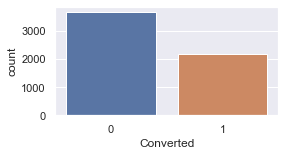

In [50]:
#checking output class balance 
sns.countplot(y_train)

## Without PCA

In [51]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, stratify=y, test_size=0.30, random_state=42,shuffle=True)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [53]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
score=lg.score(X_train,y_train)
print('model score for',lg,'is:',score)
y_pred=lg.predict(X_test)
clr=classification_report(y_test,y_pred)
print('classification report for',lg,'is:',clr)
cfm=confusion_matrix(y_test,y_pred)
print('confusion matrix for',lg,'is:',cfm)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy score for',lg,'is:',accuracy)

model score for LogisticRegression() is: 0.8858704937638817
classification report for LogisticRegression() is:               precision    recall  f1-score   support

           0       0.90      0.93      0.91      1573
           1       0.87      0.82      0.85       936

    accuracy                           0.89      2509
   macro avg       0.89      0.88      0.88      2509
weighted avg       0.89      0.89      0.89      2509

confusion matrix for LogisticRegression() is: [[1461  112]
 [ 165  771]]
Accuracy score for LogisticRegression() is: 0.8895974491829414


In [54]:
from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(scaled_X, y)
  
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.8818525011654279


In [55]:
lg=LogisticRegression(C= 3.727593720314938)
lg.fit(X_train,y_train)
score=lg.score(X_train,y_train)
print('model score for',lg,'is:',score)
y_pred=lg.predict(X_test)
clr=classification_report(y_test,y_pred)
print('classification report for',lg,'is:',clr)
cfm=confusion_matrix(y_test,y_pred)
print('confusion matrix for',lg,'is:',cfm)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy score for',lg,'is:',accuracy)

model score for LogisticRegression(C=3.727593720314938) is: 0.8868956090893559
classification report for LogisticRegression(C=3.727593720314938) is:               precision    recall  f1-score   support

           0       0.90      0.93      0.91      1573
           1       0.87      0.83      0.85       936

    accuracy                           0.89      2509
   macro avg       0.89      0.88      0.88      2509
weighted avg       0.89      0.89      0.89      2509

confusion matrix for LogisticRegression(C=3.727593720314938) is: [[1460  113]
 [ 163  773]]
Accuracy score for LogisticRegression(C=3.727593720314938) is: 0.889996014348346


In [56]:
from sklearn import model_selection
seed=7
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
results = model_selection.cross_val_score(lg,scaled_X, y, cv=kfold)
print('cross_val_score of',lg,'is :')
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

cross_val_score of LogisticRegression(C=3.727593720314938) is :
Accuracy: 88.567% (1.096%)


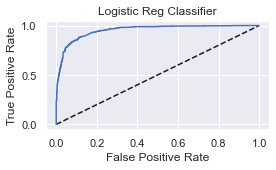

0.8770087235996327


In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lg.fit(X_train,y_train)
predy=lg.predict(X_test)
y_pred_prob=lg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Reg Classifier')
plt.show()

auc_score=roc_auc_score(y_test,predy)
print(auc_score)

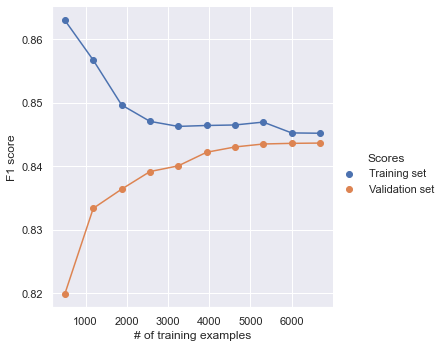

In [58]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedShuffleSplit
sample_space = np.linspace(500, len(scaled_X) * 0.8, 10, dtype='int')

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=lg,
    X=scaled_X,
    y=y,
    train_sizes=sample_space,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=40),
    scoring='f1',
    n_jobs=-1
)


def make_tidy(sample_space, train_scores, valid_scores):
    messy_format = pd.DataFrame(
        np.stack((sample_space, train_scores.mean(axis=1),
                  valid_scores.mean(axis=1)), axis=1),
        columns=['# of training examples', 'Training set', 'Validation set']
    )
    
    return pd.melt(
        messy_format,
        id_vars='# of training examples',
        value_vars=['Training set', 'Validation set'],
        var_name='Scores',
        value_name='F1 score'
    )


g = sns.FacetGrid(
    make_tidy(sample_space, train_scores, valid_scores), hue='Scores', size=5
)

g.map(plt.scatter, '# of training examples', 'F1 score')
g.map(plt.plot, '# of training examples', 'F1 score').add_legend();

## With PCA

In [59]:
from sklearn.model_selection import train_test_split
X = labeled_df.drop('Converted', axis=1)
y = labeled_df['Converted']

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = X.columns
scaled_X = pd.DataFrame(scaler.fit_transform(X[cols[:3]]), columns=cols[:3])
scaled_X = pd.concat([scaled_X, X.drop(cols[:3], axis=1).reset_index(drop=True)], axis=1)

In [61]:
from sklearn.decomposition import PCA
pca=PCA(n_components=53)
scaled_X=pca.fit_transform(scaled_X.values)

In [62]:
scaled_X.shape

(8362, 53)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, stratify=y, test_size=0.30, random_state=42,shuffle=True)

In [64]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
score=lg.score(X_train,y_train)
print('model score for',lg,'is:',score)
y_pred=lg.predict(X_test)
clr=classification_report(y_test,y_pred)
print('classification report for',lg,'is:',clr)
cfm=confusion_matrix(y_test,y_pred)
print('confusion matrix for',lg,'is:',cfm)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy score for',lg,'is:',accuracy)

model score for LogisticRegression() is: 0.8913377754997437
classification report for LogisticRegression() is:               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1573
           1       0.89      0.83      0.86       936

    accuracy                           0.90      2509
   macro avg       0.90      0.89      0.89      2509
weighted avg       0.90      0.90      0.90      2509

confusion matrix for LogisticRegression() is: [[1478   95]
 [ 158  778]]
Accuracy score for LogisticRegression() is: 0.8991630131526505


In [65]:
from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(scaled_X, y)
  
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 163789.3706954068}
Best score is 0.8884292320760061


In [71]:
lg=LogisticRegression(C= 163789.3706954068)
lg.fit(X_train,y_train)
score=lg.score(X_train,y_train)
print('model score for',lg,'is:',score)
y_pred=lg.predict(X_test)
clr=classification_report(y_test,y_pred)
print('classification report for',lg,'is:',clr)
cfm=confusion_matrix(y_test,y_pred)
print('confusion matrix for',lg,'is:',cfm)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy score for',lg,'is:',accuracy)

model score for LogisticRegression(C=163789.3706954068) is: 0.8933880061506919
classification report for LogisticRegression(C=163789.3706954068) is:               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1573
           1       0.89      0.83      0.86       936

    accuracy                           0.90      2509
   macro avg       0.89      0.88      0.89      2509
weighted avg       0.90      0.90      0.90      2509

confusion matrix for LogisticRegression(C=163789.3706954068) is: [[1474   99]
 [ 159  777]]
Accuracy score for LogisticRegression(C=163789.3706954068) is: 0.8971701873256277


In [72]:
from sklearn import model_selection
seed=7
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
results = model_selection.cross_val_score(lg,scaled_X, y, cv=kfold)
print('cross_val_score of',lg,'is :')
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

cross_val_score of LogisticRegression(C=163789.3706954068) is :
Accuracy: 89.249% (0.849%)


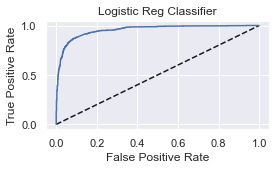

0.8835955710955712


In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lg.fit(X_train,y_train)
predy=lg.predict(X_test)
y_pred_prob=lg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Reg Classifier')
plt.show()

auc_score=roc_auc_score(y_test,predy)
print(auc_score)

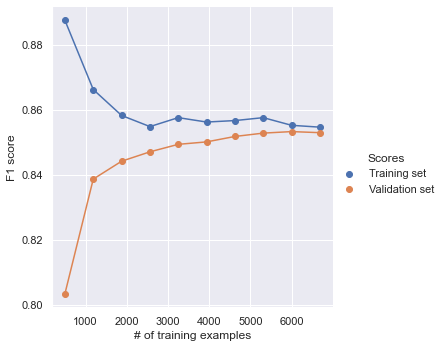

In [74]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedShuffleSplit
sample_space = np.linspace(500, len(scaled_X) * 0.8, 10, dtype='int')

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=lg,
    X=scaled_X,
    y=y,
    train_sizes=sample_space,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=40),
    scoring='f1',
    n_jobs=-1
)


def make_tidy(sample_space, train_scores, valid_scores):
    messy_format = pd.DataFrame(
        np.stack((sample_space, train_scores.mean(axis=1),
                  valid_scores.mean(axis=1)), axis=1),
        columns=['# of training examples', 'Training set', 'Validation set']
    )
    
    return pd.melt(
        messy_format,
        id_vars='# of training examples',
        value_vars=['Training set', 'Validation set'],
        var_name='Scores',
        value_name='F1 score'
    )


g = sns.FacetGrid(
    make_tidy(sample_space, train_scores, valid_scores), hue='Scores', size=5
)

g.map(plt.scatter, '# of training examples', 'F1 score')
g.map(plt.plot, '# of training examples', 'F1 score').add_legend();

In [70]:
import joblib
file='Sl.pkl'
joblib.dump(lg,file)

['Sl.pkl']